<a href="https://colab.research.google.com/github/86lekwenshiung/Neural-Network-with-Tensorflow/blob/main/02_Neural_Network_Classification_With_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0 Classification with Neural Network in Tensorflow
___

Simplyfing Classification Problem : Labelling an object as one thing or another.

Few example of classification problems:
- Binary Classification
- Multiclass Classification
- Multilabel Classification

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.set()

# 1.0 Creating data from make_circles to view and fit
___

In [5]:
from sklearn.datasets import make_circles

# Keyword input for make_circles
X , y = make_circles(n_samples = 1000,
                     shuffle = True,
                     noise = 0.03,
                     random_state = 42)


In [6]:
# Checking out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [7]:
# Checking out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [8]:
df_circle = pd.DataFrame({'X0' : X[:,0], 
                         'X1' : X[:,1] , 
                         'label' : y})
df_circle.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


### 1.1 Visualing Data
___

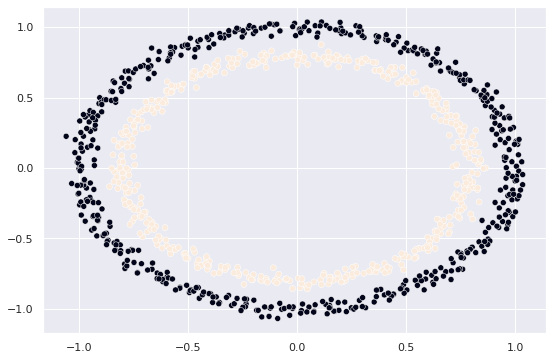

In [9]:
plt.figure(figsize = (9,6))

sns.scatterplot(x = X[:,0],
                y = X[:,1],
                c = y)
plt.show()

### 1.2 Input and Output shape
___

In [10]:
X.shape , y.shape

((1000, 2), (1000,))

In [11]:
X.ndim , y.ndim

(2, 1)

### 1.3 Building a simple model for classification
___

- Base on accuracy model score , it is around 50% or simply put , it is simply doing a guess on whether it is in the inner or outer circle

In [12]:
tf.random.set_seed(42)

# Step 1: Create the model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

# Step 2 : Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = tf.keras.metrics.binary_accuracy)

#Step 3 : Fiting the model
model_1.fit(X , y , epochs = 5 , verbose = 0)

### 1.4 Simple Improvement of the model 
___
 - (Try) Adding an extra layer and additional epochs

In [13]:
tf.random.set_seed(42)

# Step 1: Create a model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(1)
])

# Step 2 : Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = tf.keras.metrics.binary_accuracy)

#Step 3 : Fiting the model
model_2.fit(X , y , epochs = 100 , verbose = 0)

In [14]:
model_2.evaluate(X , y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - binary_accuracy: 0.5000


[0.6949685215950012, 0.5]

In [15]:
# Model Accuracy is still guessing with the accuracy at 0.5 even adding an extra layers

In [16]:
tf.random.set_seed(42)

# Step 1: Create a model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# Step 2 : Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = tf.keras.metrics.binary_accuracy)

#Step 3 : Fiting the model
model_3.fit(X , y , epochs = 100 , verbose = 0)

#Step 4 : Evaluating the model
model_3.evaluate(X , y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - binary_accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

### 1.5 Visualizing the prediction
___

- Take in a trained model , features(X) and labels(y)
- Create a meshgrid of the different X values
- Make preds across the meshgrid
- Plot preds as well as a line between zones

In [17]:
def plot_decision_boundary(model ,x , y):
  """
  Plotting the boundary created by a model predicting on x
  Resources for this plot:
    1.CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """

  # Define axis boundaries
  x_min , x_max = x[:,0].min() -0.1 , x[:,0].max() + 0.1
  y_min , y_max = x[:,1].min() -0.1 , x[:,1].max() + 0.1
  xx , yy = np.meshgrid(np.linspace(x_min , x_max , 100),
                        np.linspace(y_min , y_max , 100))

  # Make Prediction
  x_in = np.c_[xx.ravel() , yy.ravel()] # stack 2D array togethers

  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0]) > 1:
    print('This is a multiclass classification')
    y_pred = np.argmax(y_pred , axis = 1).reshape(xx.shape)
  else:
    print('This is a binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx , yy , y_pred , cmap = 'binary' , alpha = 0.7)
  plt.scatter(x[:,0] , x[:,1], c = y , s = 40 , cmap='binary')
  plt.xlim(xx.min() , xx.max())
  plt.xlim(yy.min() , yy.max())

This is a binary classification


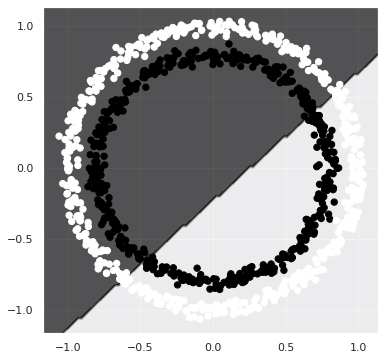

In [18]:
# We tried to improve the model, however it is observed that the perdicting feature is linear , while our data is a circle.

plt.figure(figsize = (6,6))
plot_decision_boundary(model_3 , X , y)

### 1.6 Non- Linearity
___
 - https://playground.tensorflow.org/

In [19]:
tf.random.set_seed(42)
# Step 1 : Create the model

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1 , activation = tf.keras.activations.linear)
])

# Step 2 : Compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = tf.keras.metrics.binary_accuracy)

# Step 3 : Fit the model

history_4 = model_4.fit(X , y , epochs = 100 , verbose = False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


This is a binary classification


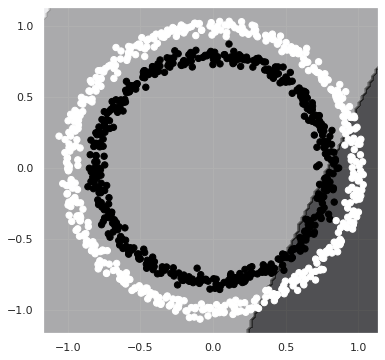

In [20]:
# Evualating model - with linear activation
plt.figure(figsize = (6,6))

plot_decision_boundary(model_4 , X , y)

In [21]:
# Attempting to build model with non-linear activation function
#  https://playground.tensorflow.org/ --> experiment it here
tf.random.set_seed(42)

# Step 1:
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1 , activation = tf.keras.activations.relu)
])

# Step 2:
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = tf.keras.metrics.binary_accuracy)

# Step 3:
model_5.fit(X , y , epochs = 100 , verbose = False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


This is a binary classification


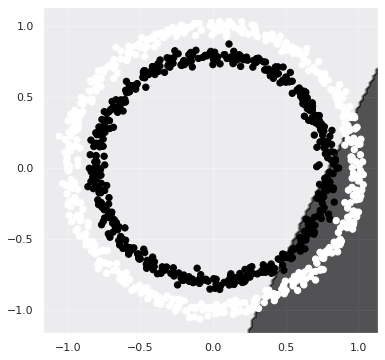

In [22]:
plt.figure(figsize = (6,6))
plot_decision_boundary(model_5 , X , y)

### 1.7 Creating a multi layer neural network from tensorflow playground simulation
___

In [23]:
tf.random.set_seed(42)

# Step 1: Create a model
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid)
])

# Step 2 : Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = tf.keras.metrics.binary_accuracy)

# Step 3 : Fit the model
history_6 = model_6.fit(X , y , epochs = 100 , verbose = False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


This is a binary classification


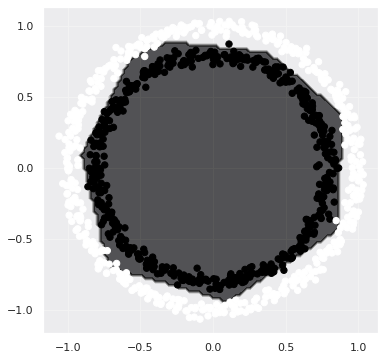

In [24]:
plt.figure(figsize = (6,6))
plot_decision_boundary(model_6 , X , y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - binary_accuracy: 0.9910
[0.2948004901409149, 0.9909999966621399]


Text(0, 0.5, 'accuracy')

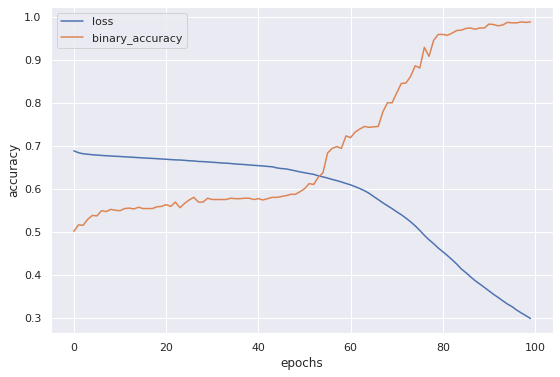

In [25]:
# Evulating 
print(model_6.evaluate(X , y))

pd.DataFrame(history_6.history).plot(figsize = (9,6))
plt.xlabel('epochs')
plt.ylabel('accuracy')

# 2.0 Visualing how the various activation change (ReLU , Sigmoid) a linear activation
___
 - https://www.tensorflow.org/api_docs/python/tf/math/sigmoid
 - sigmoid(x) = 1/(1-exp(-x))
 - ReLU = tf.maximum(0 , x)

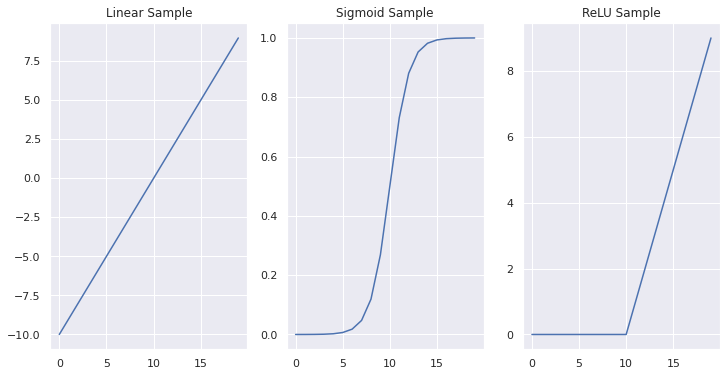

In [26]:
# Passing a linear range
sample_linear = tf.range(-10,10 , dtype = tf.float32)

# 
def sigmoid(x):
  return 1/(1+tf.exp(-x))

def relu(x):
  return tf.maximum(0 , x)

# Passing linear range via the sigmoid and relu function
sample_sigmoid = sigmoid(sample_linear)
sample_relu = relu(sample_linear)

plt.figure(figsize = (12 , 6))

# Linear Activation - Same as Linear line
plt.subplot(1,3,1)
plt.plot(sample_linear)
plt.title('Linear Sample')

# Sigmoid Activation
plt.subplot(1,3,2)
plt.plot(sample_sigmoid)
plt.title('Sigmoid Sample')

# ReLU Activation
plt.subplot(1,3,3)
plt.plot(sample_relu)
plt.title('ReLU Sample');



# 3.0 Evaluation Metrics on classification models
___

In [27]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Train test split in order - for visualisation purpose
# Of course , we couldo always do train_test_split
X_train , y_train  = X[:800] , y[:800]
X_test , y_test  = X[800:] , y[800:]

tf.random.set_seed(42)

# Step 1: Create a model

model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4 , activation  = tf.keras.activations.relu),
                               tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid)
])

# Step 2: Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = tf.keras.metrics.binary_accuracy)

# Step 3: Fit the model
history_7 = model_7.fit(X_train , y_train , epochs = 100 , verbose = False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [29]:
y_pred = model_7.predict(X_test)
model_7.evaluate(X_test , y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0245 - binary_accuracy: 0.9950


[0.02450874261558056, 0.9950000047683716]

This is a binary classification
This is a binary classification


Text(0.5, 1.0, 'Test Data')

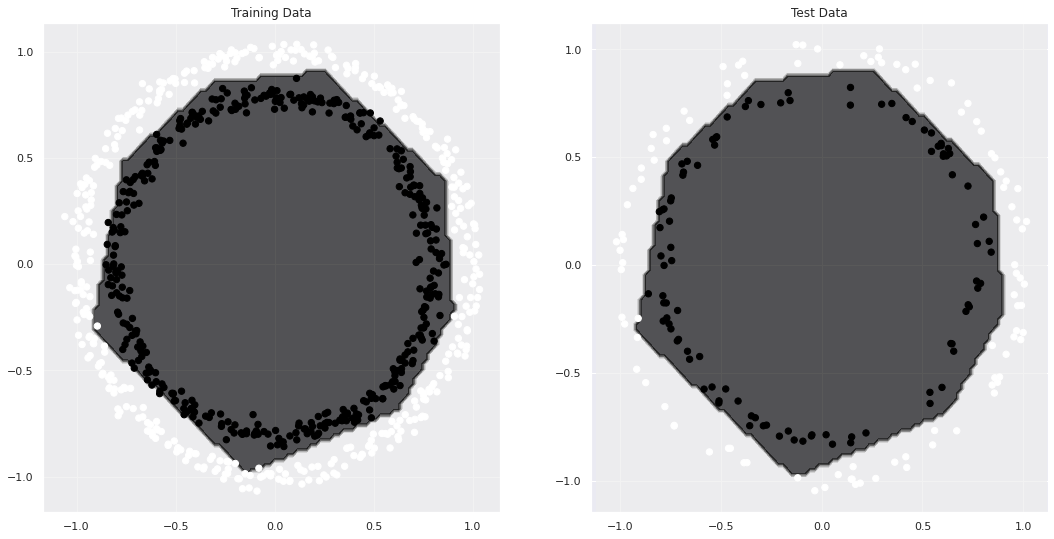

In [30]:
plt.figure(figsize = (18,9))

plt.subplot(1,2,1)
plot_decision_boundary(model_7 , X_train , y_train)
plt.title('Training Data')

plt.subplot(1,2,2)
plot_decision_boundary(model_7 , X_test , y_test)
plt.title('Test Data')

### 3.1 Evaluating the loss curves
___
 - Model 7 optimized at around the 20th epochs

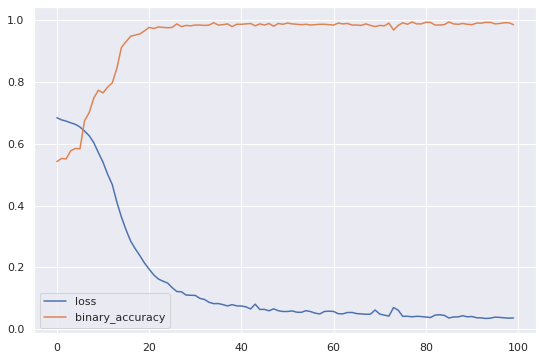

In [31]:
pd.DataFrame(history_7.history).plot(figsize = (9,6))

### 3.2 Learning Rate Call Back
___

In [32]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [33]:
tf.random.set_seed(42)


# Step 1 : Create a model
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid)
])

# Step 2 : Compile a model
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = tf.keras.metrics.binary_accuracy)

# Step 3a : Creating a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Step 3b : Fit the model
history_8 = model_8.fit(X_train, 
                        y_train, 
                        epochs = 100, 
                        callbacks = [lr_scheduler], 
                        verbose = False)

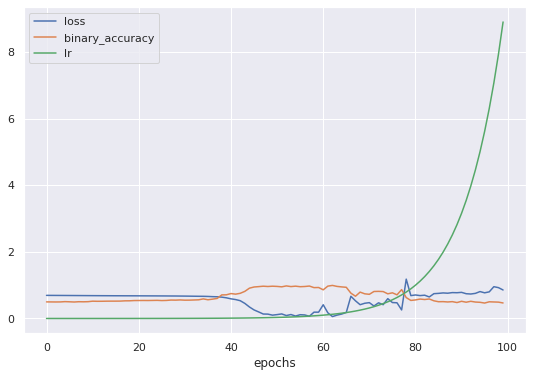

In [34]:
pd.DataFrame(history_8.history).plot(figsize = (9,6))
plt.xlabel('epochs');

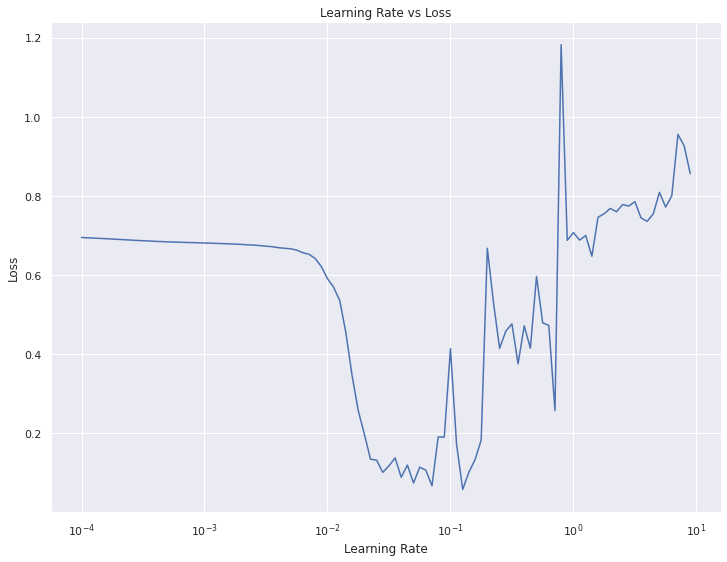

In [35]:
# Learning Rate vs Loss

lr_scale = 1e-4 * 10**(tf.range(100)/20)
loss_function = history_8.history['loss']

plt.figure(figsize = (12,9))
plt.semilogx(lr_scale , loss_function)
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss');

In [36]:
# Observation
# Learning Rate around 10e-2 and 10e-1 had a region of optimal learning rate vs loss
# Higher learning rate does not correspond to a lower loss function

### 3.3 Additional Classification Evaluation Metrics
___
* Accuracy
* Precision
* Recall
* F1-Score
* Confusion matrix
* Classification report

In [37]:
loss , accuracy = model_8.evaluate(X_test , y_test)

print(f'Model loss on test set:{loss}')
print(f'Model loss on train set:{(accuracy*100):.2f}')

7/7 [==============================] - 0s 3ms/step - loss: 0.6933 - binary_accuracy: 0.4950
Model loss on test set:0.6933157444000244
Model loss on train set:49.50


In [38]:
# Confusion Matrix - To prevent valueError: Classification metrics can't handle a mix of binary and continuous targets, need to round to binary format

y_pred = model_7.predict(X_test)

print(y_pred[:5])
print(tf.round(y_pred[:5]))
print(y_test[:5])

conf_mat = confusion_matrix(y_test , tf.round(y_pred))

[[0.99714994]
 [0.99997467]
 [0.9950974 ]
 [0.9928702 ]
 [0.00110337]]
tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [0.]], shape=(5, 1), dtype=float32)
[1 1 1 1 0]


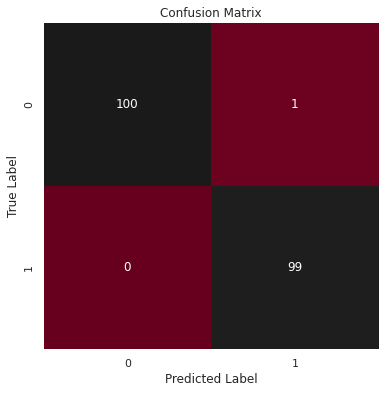

In [39]:
plt.figure(figsize = (6,6))
sns.heatmap(conf_mat,
            annot = True,
            fmt = '.3g',
            cmap = 'RdGy',
            cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix');

# 4.0 Working on Multiclass Dataset
___

Multiclass is when more than 2 classes as option. For Eg.
- Large , Medium , Small
- Shoe , Shirt , Pants , etc.

### 4.1 Tensorflow datasets : Fashion mnist
___

In [40]:
from tensorflow.keras.datasets import fashion_mnist


(train_data , train_labels) , (test_data , test_labels) = fashion_mnist.load_data()

In [41]:
# Checking the Parameter of Data
print('Train Data Ndim :' , train_data.ndim)
print('Train Label Ndim :' , train_labels.ndim)
print('Train Data Shape :' , train_data[0].shape)
print('Train Label Shape :' , train_labels[0].shape)
print('Train Data Size :' , train_data.size)
print('Test Data Size :' , test_data.size)

Train Data Ndim : 3
Train Label Ndim : 1
Train Data Shape : (28, 28)
Train Label Shape : ()
Train Data Size : 47040000
Test Data Size : 7840000


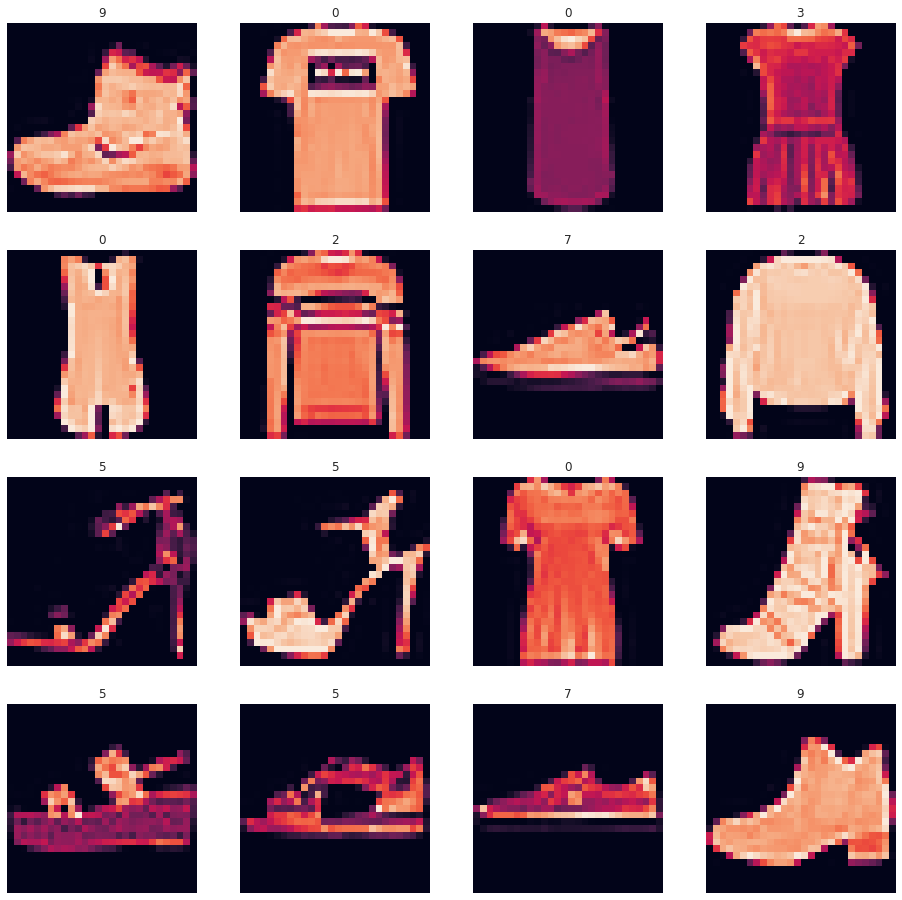

In [42]:
### Plotting Samples - Note that Label is still in encoded labels betwen 0 to 9

plt.figure(figsize = (16,16))
for i in range(16):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(train_data[i])
  label = train_labels[i]

  plt.title(label)
  plt.axis('off')

In [43]:
# Create a list to index items to encoded number

label_name = ['T-shirt/top' , 'Trouser' , 'Pullover' , 'Dress' , 'Coat' , 'Sandal' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankleboots']
label_name[train_labels[17]]

'T-shirt/top'

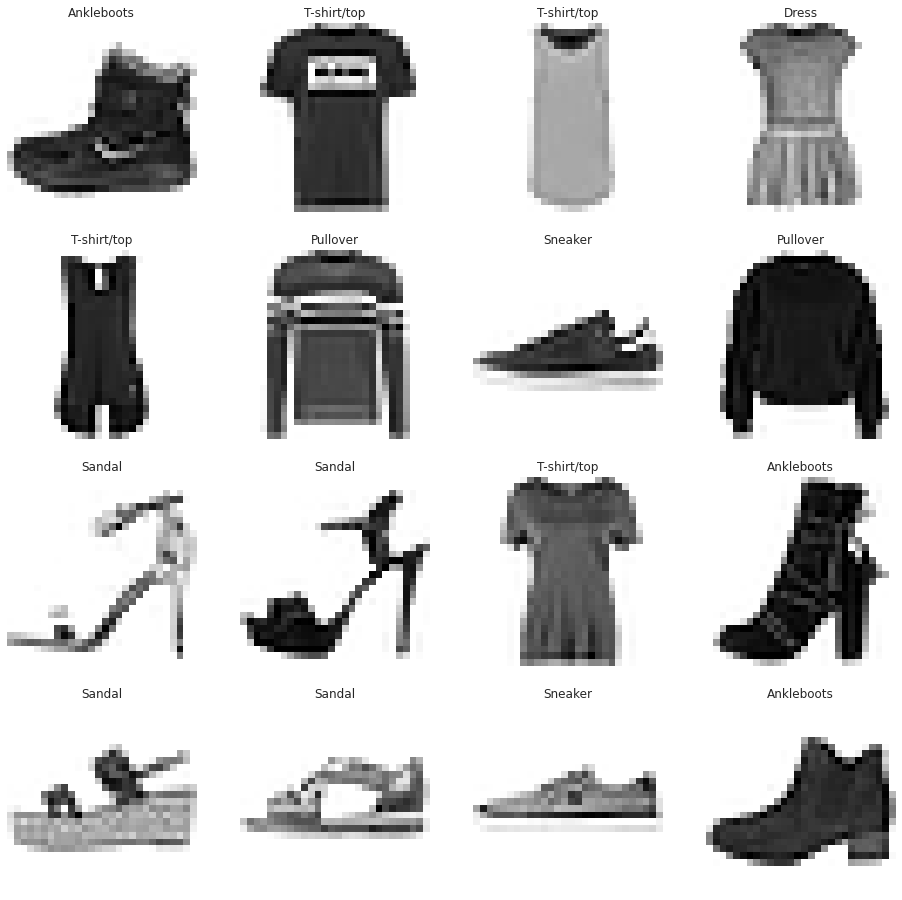

In [44]:
plt.figure(figsize = (16,16))

for i in range(16):
  ax = plt.subplot(4,4, i+1)
  plt.imshow(train_data[i] , cmap = 'binary')
  label = label_name[train_labels[i]]

  plt.title(label)
  plt.axis('off')

### 4.2 Building Multiclass model
___

* Loss Function  = tf.keras.losses.CategoricalCrossEntropy()
  * If labels are Int , use SparseCategoricalCrossEntropy
  * If labels are one-hot-encoded , use CategoricalCrossEntropy

* Recap from earlier

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

In [45]:
tf.random.set_seed(42)

# Step 1 : Create a model 
model_9 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28)),  # Input data need to be flattened from 28,28 to None , 784
                             tf.keras.layers.Dense(4 , activation = 'relu'),
                             tf.keras.layers.Dense(4 , activation = 'relu'),
                             tf.keras.layers.Dense(10 , activation = 'softmax')
])

# Step 2 : Compile the model - Loss Function  = SparseCatergoricalCross
model_9.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), # SparseCC take in int while C.C take in One-Hot-Encoded
                optimizer = tf.keras.optimizers.Adam(),
                metrics = tf.keras.metrics.binary_accuracy)

# Step 3 : Fit the model
non_nom_history_9 = model_9.fit(train_data,
                              train_labels,
                              epochs = 10,
                              validation_data = (test_data , test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - binary_accuracy: 0.1000 - val_loss: 1.7959 - val_binary_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - binary_accuracy: 0.1000 - val_loss: 1.6567 - val_binary_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - binary_accuracy: 0.1000 - val_loss: 1.6094 - val_binary_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - binary_accuracy: 0.1000 - val_loss: 1.6041 - val_binary_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - binary_accuracy: 0.1000 - val_loss: 1.6064 - val_binary_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - binary_accuracy: 0.1000 - val_loss: 1.5747 - val_binary_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================

In [46]:
tf.random.set_seed(42)

# Step 1 : Create a model 
model_10 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28)),  # Input data need to be flattened from 28,28 to None , 784
                             tf.keras.layers.Dense(4 , activation = 'relu'),
                             tf.keras.layers.Dense(4 , activation = 'relu'),
                             tf.keras.layers.Dense(10 , activation = 'softmax')
])

# Step 2 : Compile the model - Loss Function  = CatergoricalCross
model_10.compile(loss = tf.keras.losses.CategoricalCrossentropy(), # SparseCC take in int while C.C take in One-Hot-Encoded
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = tf.keras.metrics.binary_accuracy)

# Step 3 : Fit the model - Require to tf.one_hot(labels)
non_nom_history_10 = model_10.fit(train_data,
                              tf.one_hot(train_labels, depth = 10),
                              epochs = 10,
                              validation_data = (test_data , tf.one_hot(test_labels , depth  = 10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - binary_accuracy: 0.9011 - val_loss: 1.7959 - val_binary_accuracy: 0.9047
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - binary_accuracy: 0.9055 - val_loss: 1.6567 - val_binary_accuracy: 0.9062
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - binary_accuracy: 0.9075 - val_loss: 1.6094 - val_binary_accuracy: 0.9082
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - binary_accuracy: 0.9079 - val_loss: 1.6041 - val_binary_accuracy: 0.9092
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - binary_accuracy: 0.9082 - val_loss: 1.6064 - val_binary_accuracy: 0.9076
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - binary_accuracy: 0.9088 - val_loss: 1.5747 - val_binary_accuracy: 0.9108
Epoch 7/10
1875/1875 [==============================

### 4.3 Normalizing dataset between 0 & 1
___

* Neural Network prefer data to be scaled or normalize betwen 0 & 1

In [47]:
# Before Normalisation
print(train_data.min())
print(train_data.max())

0
255


In [48]:
train_data_norm = train_data/train_data.max()
test_data_norm = test_data/test_data.max()

In [49]:
# After Simple Normalisation
print(train_data_norm.min())
print(train_data_norm.max())
print(test_data_norm.min())
print(test_data_norm.max())

0.0
1.0
0.0
1.0


In [50]:
tf.random.set_seed(42)

# Step 1 : Build a model

model_11 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28,28)),
                                tf.keras.layers.Dense(4 , activation = 'relu'),
                                tf.keras.layers.Dense(4 , activation = 'relu'),
                                tf.keras.layers.Dense(10 , activation = 'softmax')
])

# Step 2 : Compile the model
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = tf.keras.metrics.binary_accuracy)


# Step 3 : Fit the model
norm_history = model_11.fit(train_data_norm,
                           train_labels,
                           epochs = 10,
                           validation_data = (test_data_norm , test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - binary_accuracy: 0.1013 - val_loss: 0.6937 - val_binary_accuracy: 0.1022
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - binary_accuracy: 0.1019 - val_loss: 0.6400 - val_binary_accuracy: 0.1025
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - binary_accuracy: 0.1018 - val_loss: 0.6247 - val_binary_accuracy: 0.1021
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - binary_accuracy: 0.1018 - val_loss: 0.6078 - val_binary_accuracy: 0.1020
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - binary_accuracy: 0.1016 - val_loss: 0.6169 - val_binary_accuracy: 0.1016
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - binary_accuracy: 0.1016 - val_loss: 0.5855 - val_binary_accuracy: 0.1018
Epoch 7/10
1875/1875 [==============================

### 4.4 Visualizing Model
___

* Even with the alightest tweak in parameters wuth the **same dataset** , the output model results can be different.

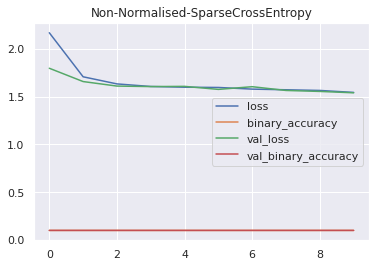

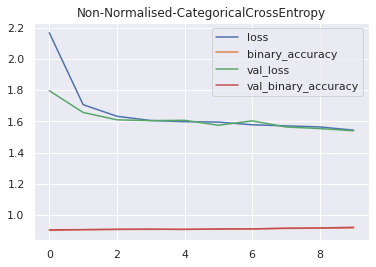

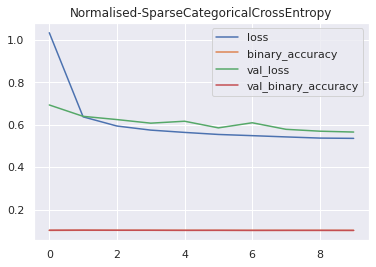

In [52]:
ax1 = pd.DataFrame(non_nom_history_9.history).plot(title = 'Non-Normalised-SparseCrossEntropy')

ax2 =  pd.DataFrame(non_nom_history_10.history).plot(title = 'Non-Normalised-CategoricalCrossEntropy')

ax3 =  pd.DataFrame(norm_history.history).plot(title = 'Normalised-SparseCategoricalCrossEntropy')

### 4.5 Searching for Ideal Learning Rate
___

In [56]:
tf.random.set_seed(42)

# Step 1 : Create a Model
model_12 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28,28)),
                                tf.keras.layers.Dense(4 , activation = 'relu'),
                                tf.keras.layers.Dense(4 , activation  = 'relu'),
                                tf.keras.layers.Dense(10 , activation  = 'softmax')
])

# Step 2 : Compile the Model
model_12.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = tf.keras.metrics.binary_accuracy)

#Step 3a - Define the LR schedule
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

#Step 3b- Fit the model
lr_history_12 = model_12.fit(train_data_norm,
                             tf.one_hot(train_labels, depth  = 10),
                             epochs = 40,
                             validation_data = (test_data_norm , tf.one_hot(test_labels , depth=10)),
                             callbacks = [lr_scheduler],
                             verbose = False)

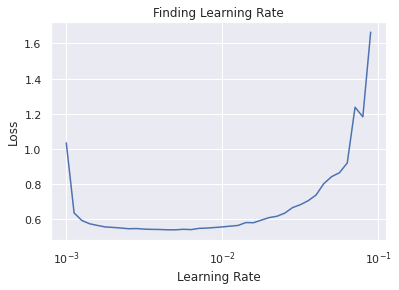

In [61]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, lr_history_12.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding Learning Rate');

In [62]:
# The loss drop sharply at learning rate ~ 0.001. This correspond to Adam Optimizer default lr = 0.001

### 4.6 Evaluating MultiClass Classification Model
___

In [99]:
# Note - Our data is trained on normalised dataset , so prediction should be on normalised dataset as well
# Our model.predict return an array of prediction probability
y_prob = model_11.predict(test_data_norm)

In [100]:
print(f'Predict Proba: {y_prob[0]}')
print(f'Class Name List : {label_name}')
print(f'Location of Highest Proba : {tf.argmax(y_prob[0])}')
print(f'Name from Class List Corresponding to Highest Proba : {label_name[tf.argmax(y_prob[0])]}')

Predict Proba: [2.6757524e-10 8.3620770e-15 4.8127029e-05 3.4011549e-08 1.2373683e-04
 2.7335325e-01 3.3961396e-07 8.8269934e-02 6.1673694e-03 6.3203722e-01]
Class Name List : ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboots']
Location of Highest Proba : 9
Name from Class List Corresponding to Highest Proba : Ankleboots


In [101]:
# Return y_pred as an array of position with the highest probability
y_pred = y_prob.argmax(axis=1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

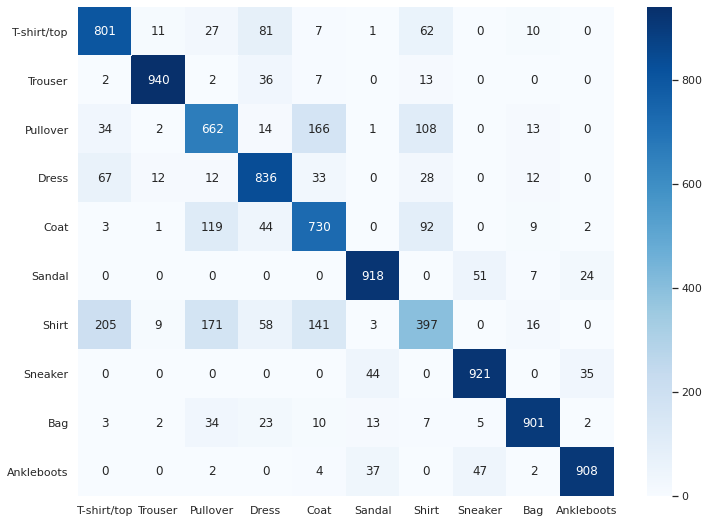

In [103]:
cm = confusion_matrix(y_true = test_labels,
                      y_pred = y_pred)

plt.figure(figsize =(12,9))
sns.heatmap(cm,
            cmap = 'Blues',
            annot = True,
            xticklabels = label_name,
            yticklabels = label_name,
            fmt = '.4g');

In [104]:
# Model is confused for some labels , such as Shirt vs T-Shirt (205 wrong pred) , Coat vs Pullover(166 wrong pred)

### 4.7 Visualising Prediction
___

* plt.im a random image
* Make a prediction on image
* compare between true and predicted label

In [137]:
import random

def plot_random_image(model , images , test_label , labels):

  # 1. Set Up random integer
  i = random.randint(0 , len(images))

  # 2. Create Predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = labels[pred_probs.argmax()]
  true_label = labels[test_label[i]]

  # 3. Plot image
  plt.imshow(target_image , cmap = 'binary')

  # 4. Set color for correct and wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel(f'Pred:{pred_label} {100*tf.reduce_max(pred_probs):.0f}% True({true_label}) ' , color = color)

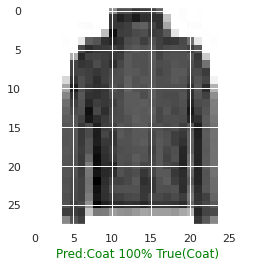

In [146]:
plot_random_image(model = model_11,
                              images = test_data,
                              test_label = test_labels,
                              labels = label_name)

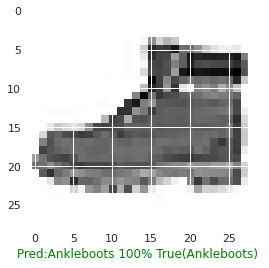

In [147]:
plot_random_image(model = model_11,
                              images = test_data,
                              test_label = test_labels,
                              labels = label_name)

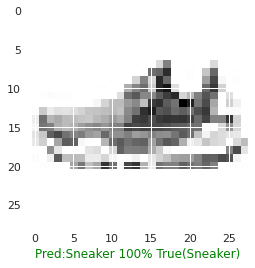

In [148]:
plot_random_image(model = model_11,
                              images = test_data,
                              test_label = test_labels,
                              labels = label_name)

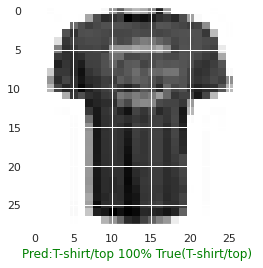

In [149]:
plot_random_image(model = model_11,
                              images = test_data,
                              test_label = test_labels,
                              labels = label_name)

# 5.0 Summary
___
* model.layers
* model.layers.get_weights
* model.summary()
* from tensorflow.keras.utilis import plot_model

1. When we start and initialize the model , it will initialize as random weights.
2. Then as we show more and more imagaes , data for the model to keep learning and finding pattern.
3. As it learns , it keep updating the representation output in the weights and biases

In [151]:
# Finding the layers of our model
model_11.layers

In [163]:
# Input shape coorespond to the weight shape
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_25 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [165]:
# Finding the weight and biases of the model
# Weight.shape (784 , 4) correspond to the matrix shown below : 4 elements each in 784 array
weight , biases = model_11.layers[1].get_weights()

weight , weight.shape

(array([[ 0.38585973, -0.01683232, -0.48614606, -0.5381741 ],
        [ 0.09176346, -0.07343104, -0.27991343,  0.0482569 ],
        [ 0.439081  ,  0.46483982, -0.6423495 , -0.44439033],
        ...,
        [-0.25405523,  0.5379417 , -0.1541084 ,  0.15027715],
        [-0.23082401,  0.45492047,  0.08331519, -0.3790486 ],
        [ 0.15038309,  0.13788234, -0.14806941, -0.0106601 ]],
       dtype=float32), (784, 4))

In [171]:
# Bias vector
# Every neuron has a bias vector. Each of these is paired with a weight matrix
# The bias vector get initialised as zeroes (in the case of tensorflow dense layer by default)
# The bias vector determine how much ther pattern within the corresponding weight matrix should influence the next layer

biases , biases.shape

(array([-0.07772563,  0.08738977, -0.36895958,  0.72360265], dtype=float32),
 (4,))

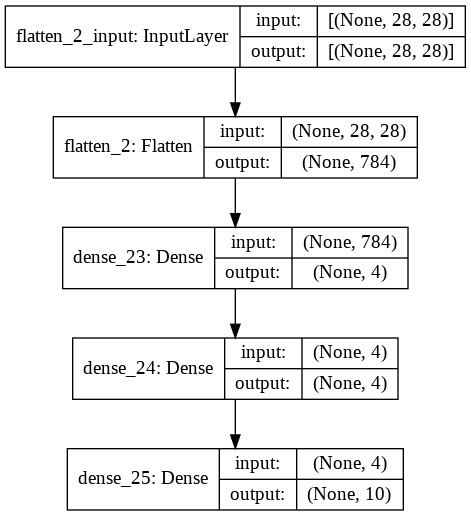

In [173]:
from tensorflow.keras.utils import plot_model
plot_model(model_11 , show_shapes = True)